<a href="https://colab.research.google.com/github/arj442/Practice/blob/main/Price%20Prediction%20Avocados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Business Problem

As a data analyst for a food retailer, I have undertaken the task of developing a proof of concept for utilizing data analysis to forecast fresh food prices. Specifically, I have chosen historical avocado prices as the dataset for my analysis.

My aim is to utilize at least three distinct models to conduct my analysis, and subsequently provide a recommendation for the most optimal option. The following is a comprehensive dictionary of the avocado dataset that will be used in this analysis.

The dataset comprises of 18249 observations of 14 columns. Below is a table showing names of all the columns and their description.

The unclear numerical variables terminology is explained in the next section:

#2) Imports of Libraries and Helper Functions

In [ ]:
#data analysis libraries
import numpy as np
import pandas as pd
import datetime
import scipy as sp

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#**3) Data Acquisition**

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving avocado_data.csv to avocado_data (2).csv


In [ ]:
#import data as a dataframe
df= pd.read_csv("/content/avocado_data.csv")

#4) **Data Pre-Processing**

## Dimensions of Data Quality

Data quality is one of the critical processes in building any predictive model. Ensuring high data quality allows for improved accuracy and reliability of the model produced.

Ramzan et al. (2021) highlight the need for data preprocessing and cleaning using Python libraries such as Pandas and Scikit-learn to ensure high-quality data for machine learning applications.

The following steps will cover the data quality dimensions to ensure high data quality:

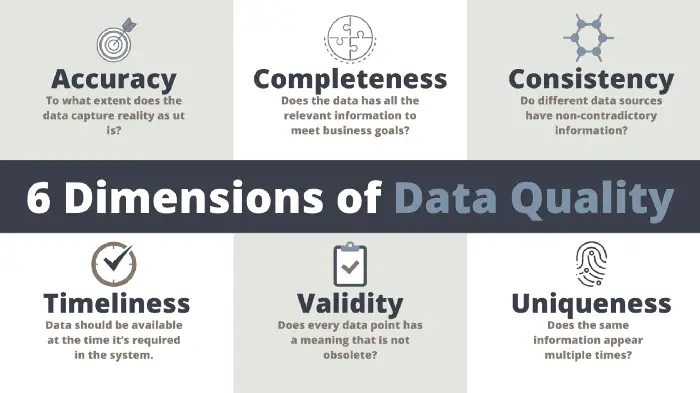

In [ ]:
#Review shape of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   Type PLU4046  18249 non-null  float64
 5   Type PLU4225  18249 non-null  float64
 6   Type PLU4770  18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns.

In [ ]:
# Data Completness
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
Type PLU4046    0
Type PLU4225    0
Type PLU4770    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

This shows that their is no N/A or missing values in the dataset

In [ ]:
latest_date = df['Date'].max()
earliest_date= df['Date'].min()
print(latest_date)
print(earliest_date)

31/12/2017
01/01/2017


The data covers the period between 4th January until 25th March 2018.

The latest

In [ ]:
# Total number of duplicates
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


We don't have any null or duplicate value.

The first column is a redundant index column, this will not be used further in the analysis so will be dropped now.

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,Type PLU4046,Type PLU4225,Type PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now let's do some Feature Engineering on the Date Feature so we can be able to use the day and the month columns in building our machine learning model later.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,Type PLU4046,Type PLU4225,Type PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


##Detection of Outliers

We can use Standard Deviation or Quantile to detect if any outliers

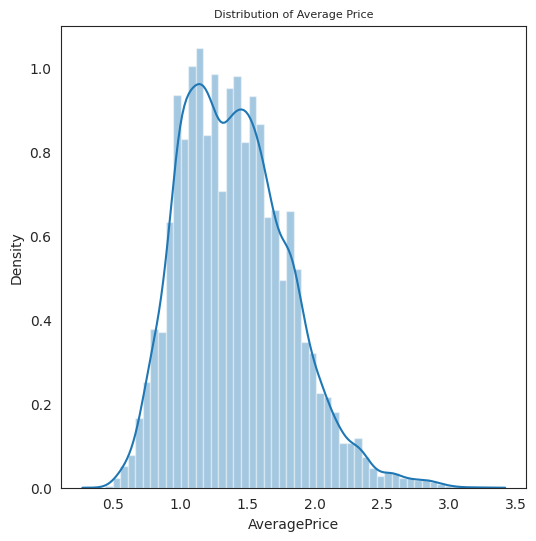

In [ ]:
sns.set_style("white")

plt.figure(figsize=(6,6))
sns.distplot(df.AveragePrice)
plt.title("Distribution of Average Price",fontsize=8);

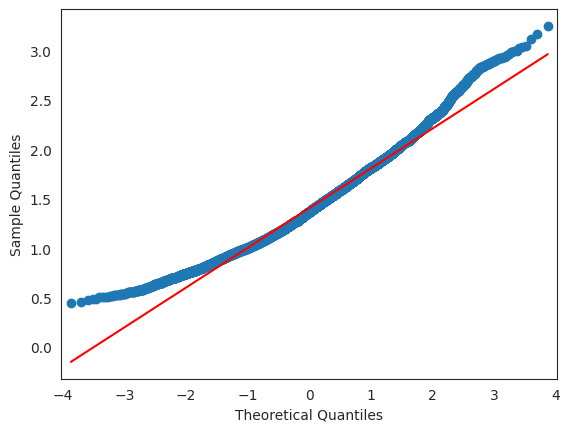

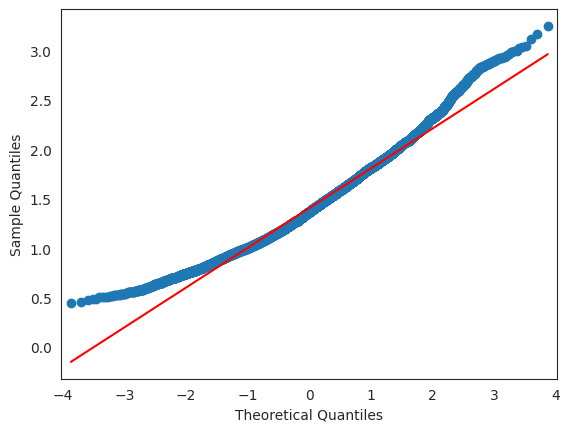

In [ ]:
import statsmodels.api as sm
sm.qqplot(df.AveragePrice,line="s")

*   1 std from mean : 68% of data included
*   2 std from mean : 95% of data included
*   3 std from mean: 99.7% of data included

In [ ]:
mean = df.AveragePrice.mean()
std = df.AveragePrice.std()
lower, upper = mean-std*2,mean+std*2 # Use 2*std and it will exclude data that is not included in 95% of data
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 0.6006252987847768 Upper Limit : 2.2113315207669793


In [ ]:
outliers = [x for x in df.AveragePrice if x < lower or x > upper]
print("Outlier values : {}".format(outliers))

Outlier values : [0.49, 0.53, 0.56, 0.6, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.57, 0.57, 0.6, 0.6, 0.56, 0.58, 0.6, 0.6, 0.54, 0.58, 0.59, 0.58, 0.58, 0.58, 0.56, 0.58, 0.6, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 0.59, 0.56, 2.22, 0.6, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.6, 0.6, 0.6, 0.57, 0.54, 0.46, 0.58, 0.54, 0.6, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.59, 0.59, 2.28, 2.35, 2.29, 2.24, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.35, 2.28, 2.32, 2.26, 2.31, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.24, 2.34, 2.31, 2.24, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.23, 2.25, 2.29, 2.28, 2.24, 2.37, 2.49, 2.58, 2.3, 2.3, 2.25, 2.24, 2.23, 2.26, 2.28, 2.22, 2.41, 2.36, 2.54, 2.42, 2.67, 2.3, 2

# 5) EDA Anaylsis

###Overview of Data

In [ ]:
# Number of Different Regions
len(df.region.unique())

54

In [ ]:
# Count of number of different varibales for each Region
df.groupby('region').size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

There are 338 observations from each region, the dataset seems balanced, and there are 54 regions. Some regions are US cities, some are US states and a couple of entire regions (West/ TotalUS).

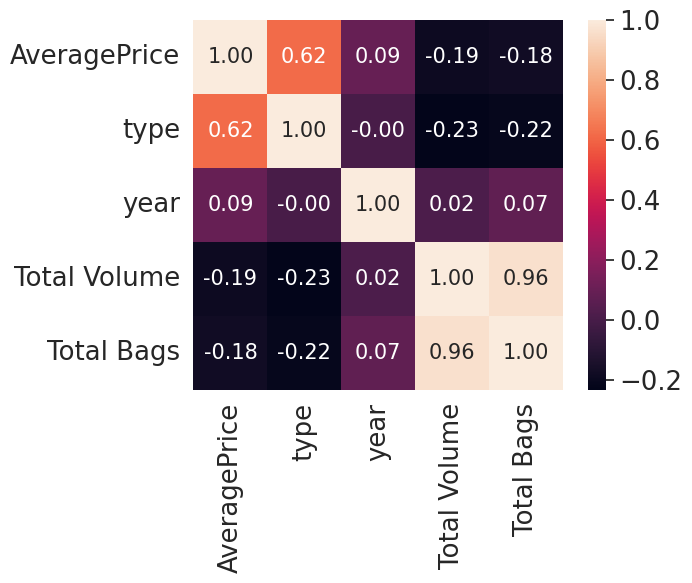

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates())
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)

cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

The type influences the price of avocado. Logically. We also see a strong correlation between "Total Bags" and "Total Volume" features. Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag.

###Overall Average Price Analysis

Text(0.5, 1.0, 'Average Price')

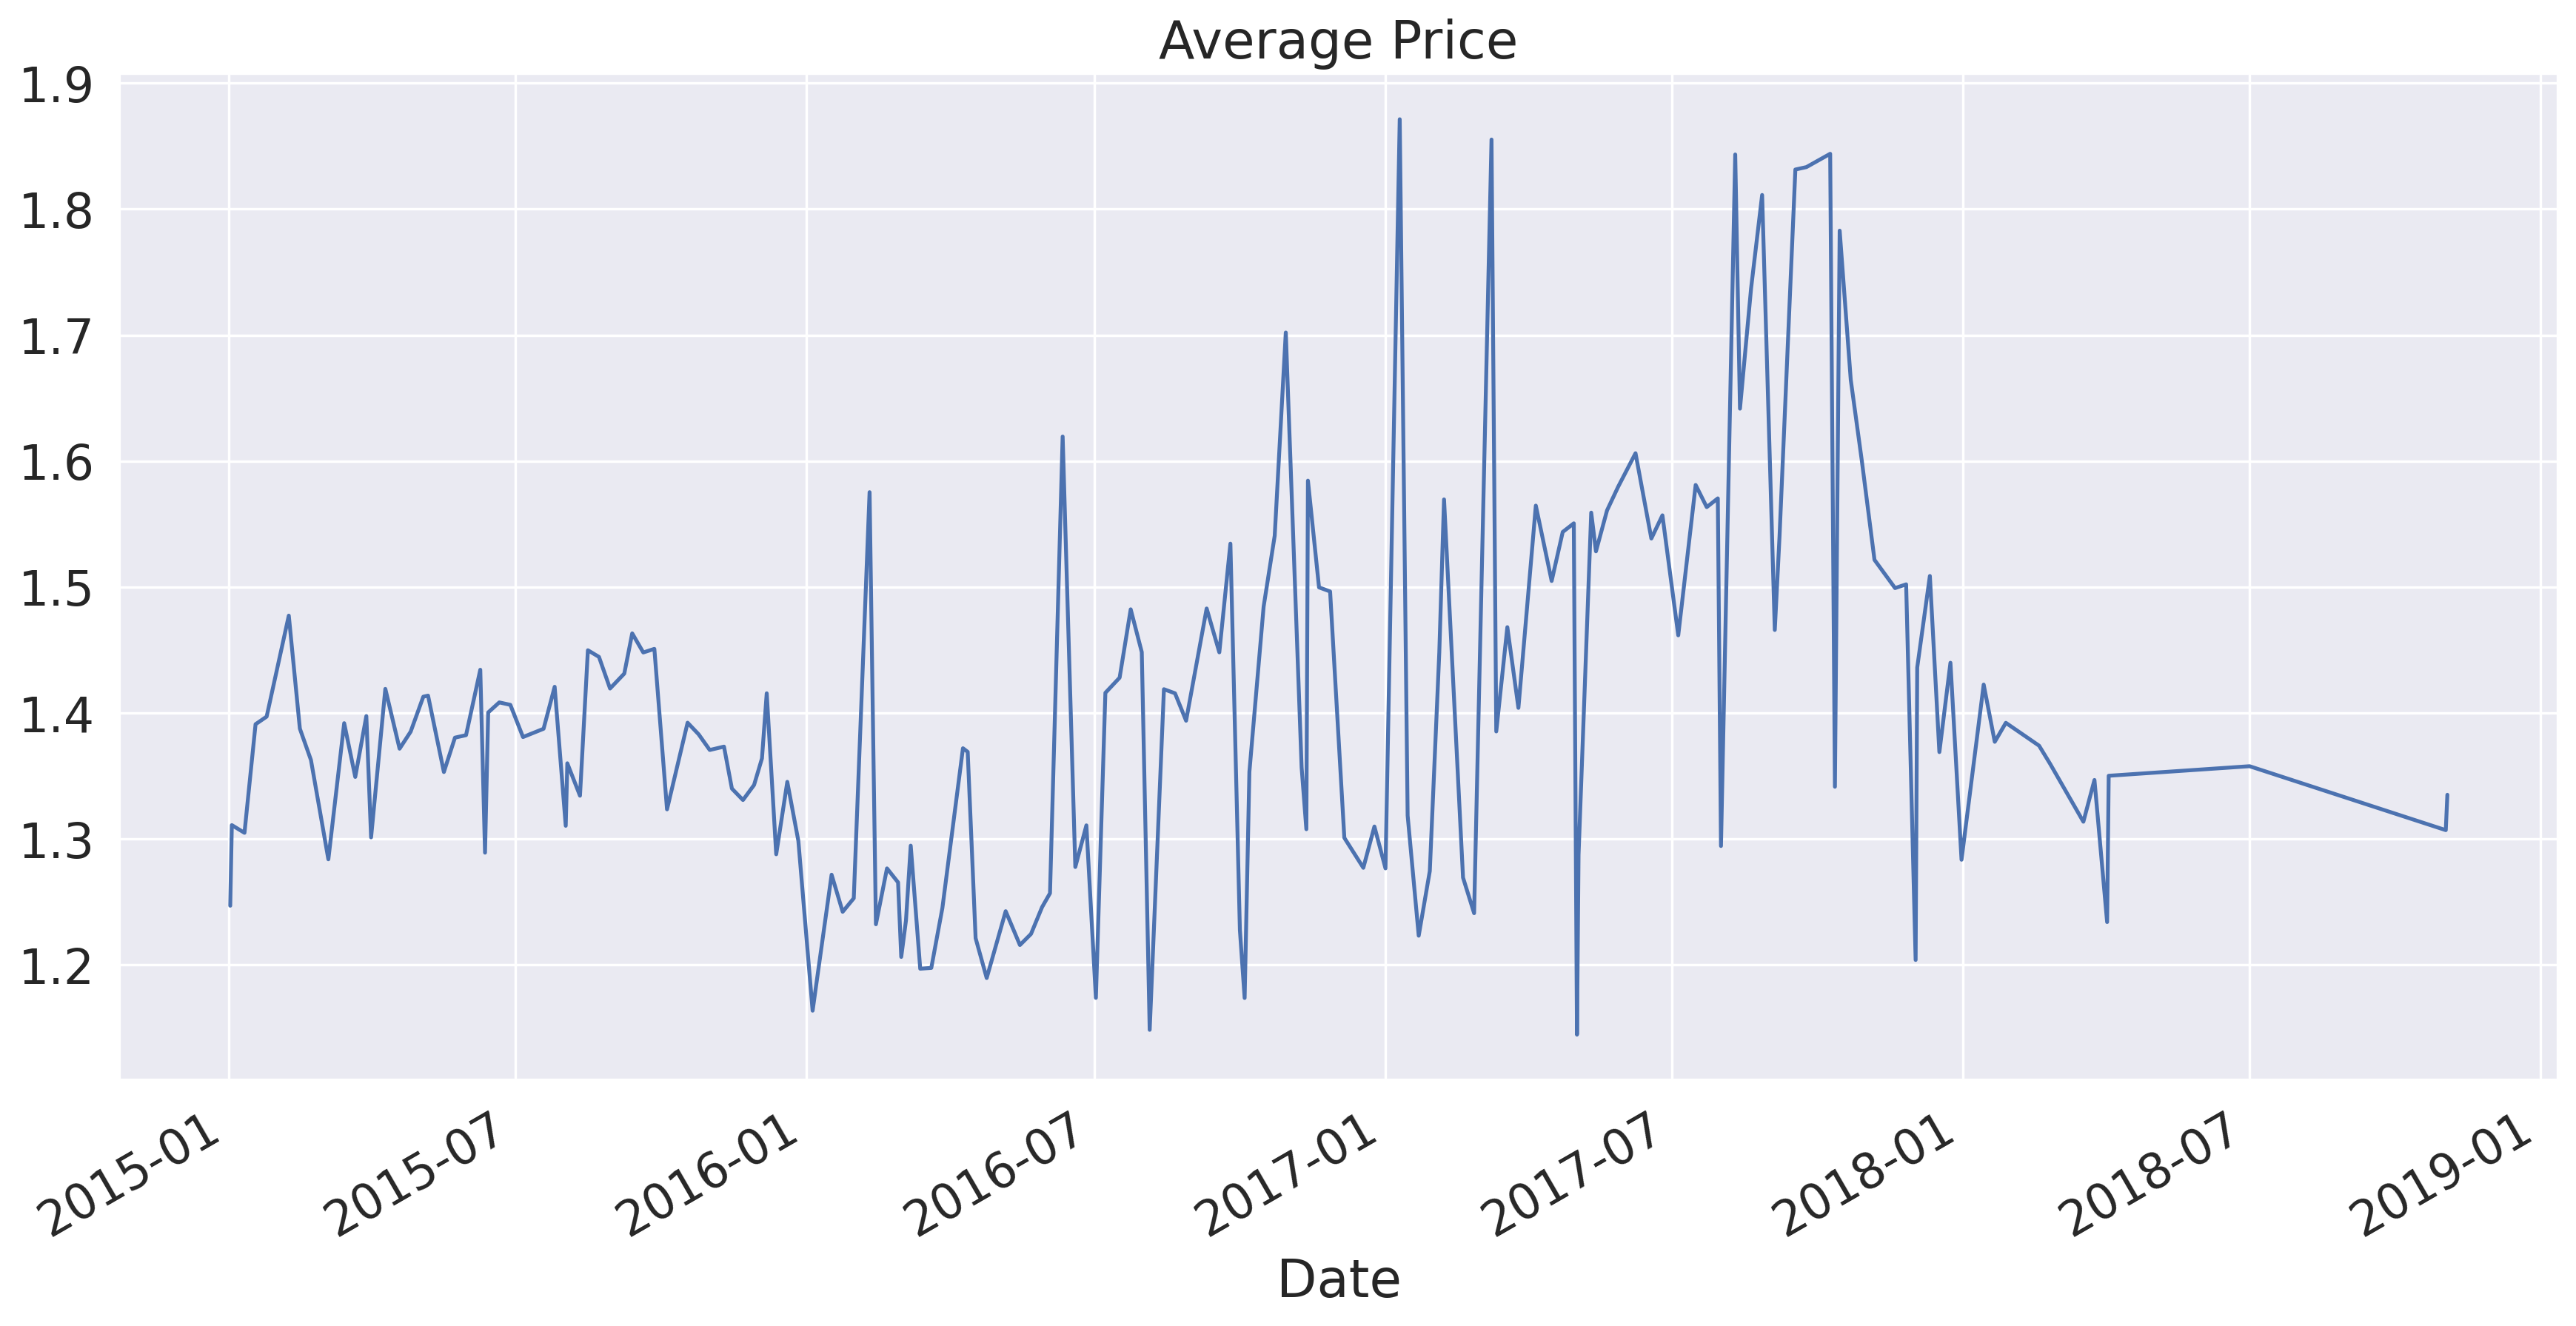

In [ ]:
#Average Price Anaylsis
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=250)
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price Per Month')

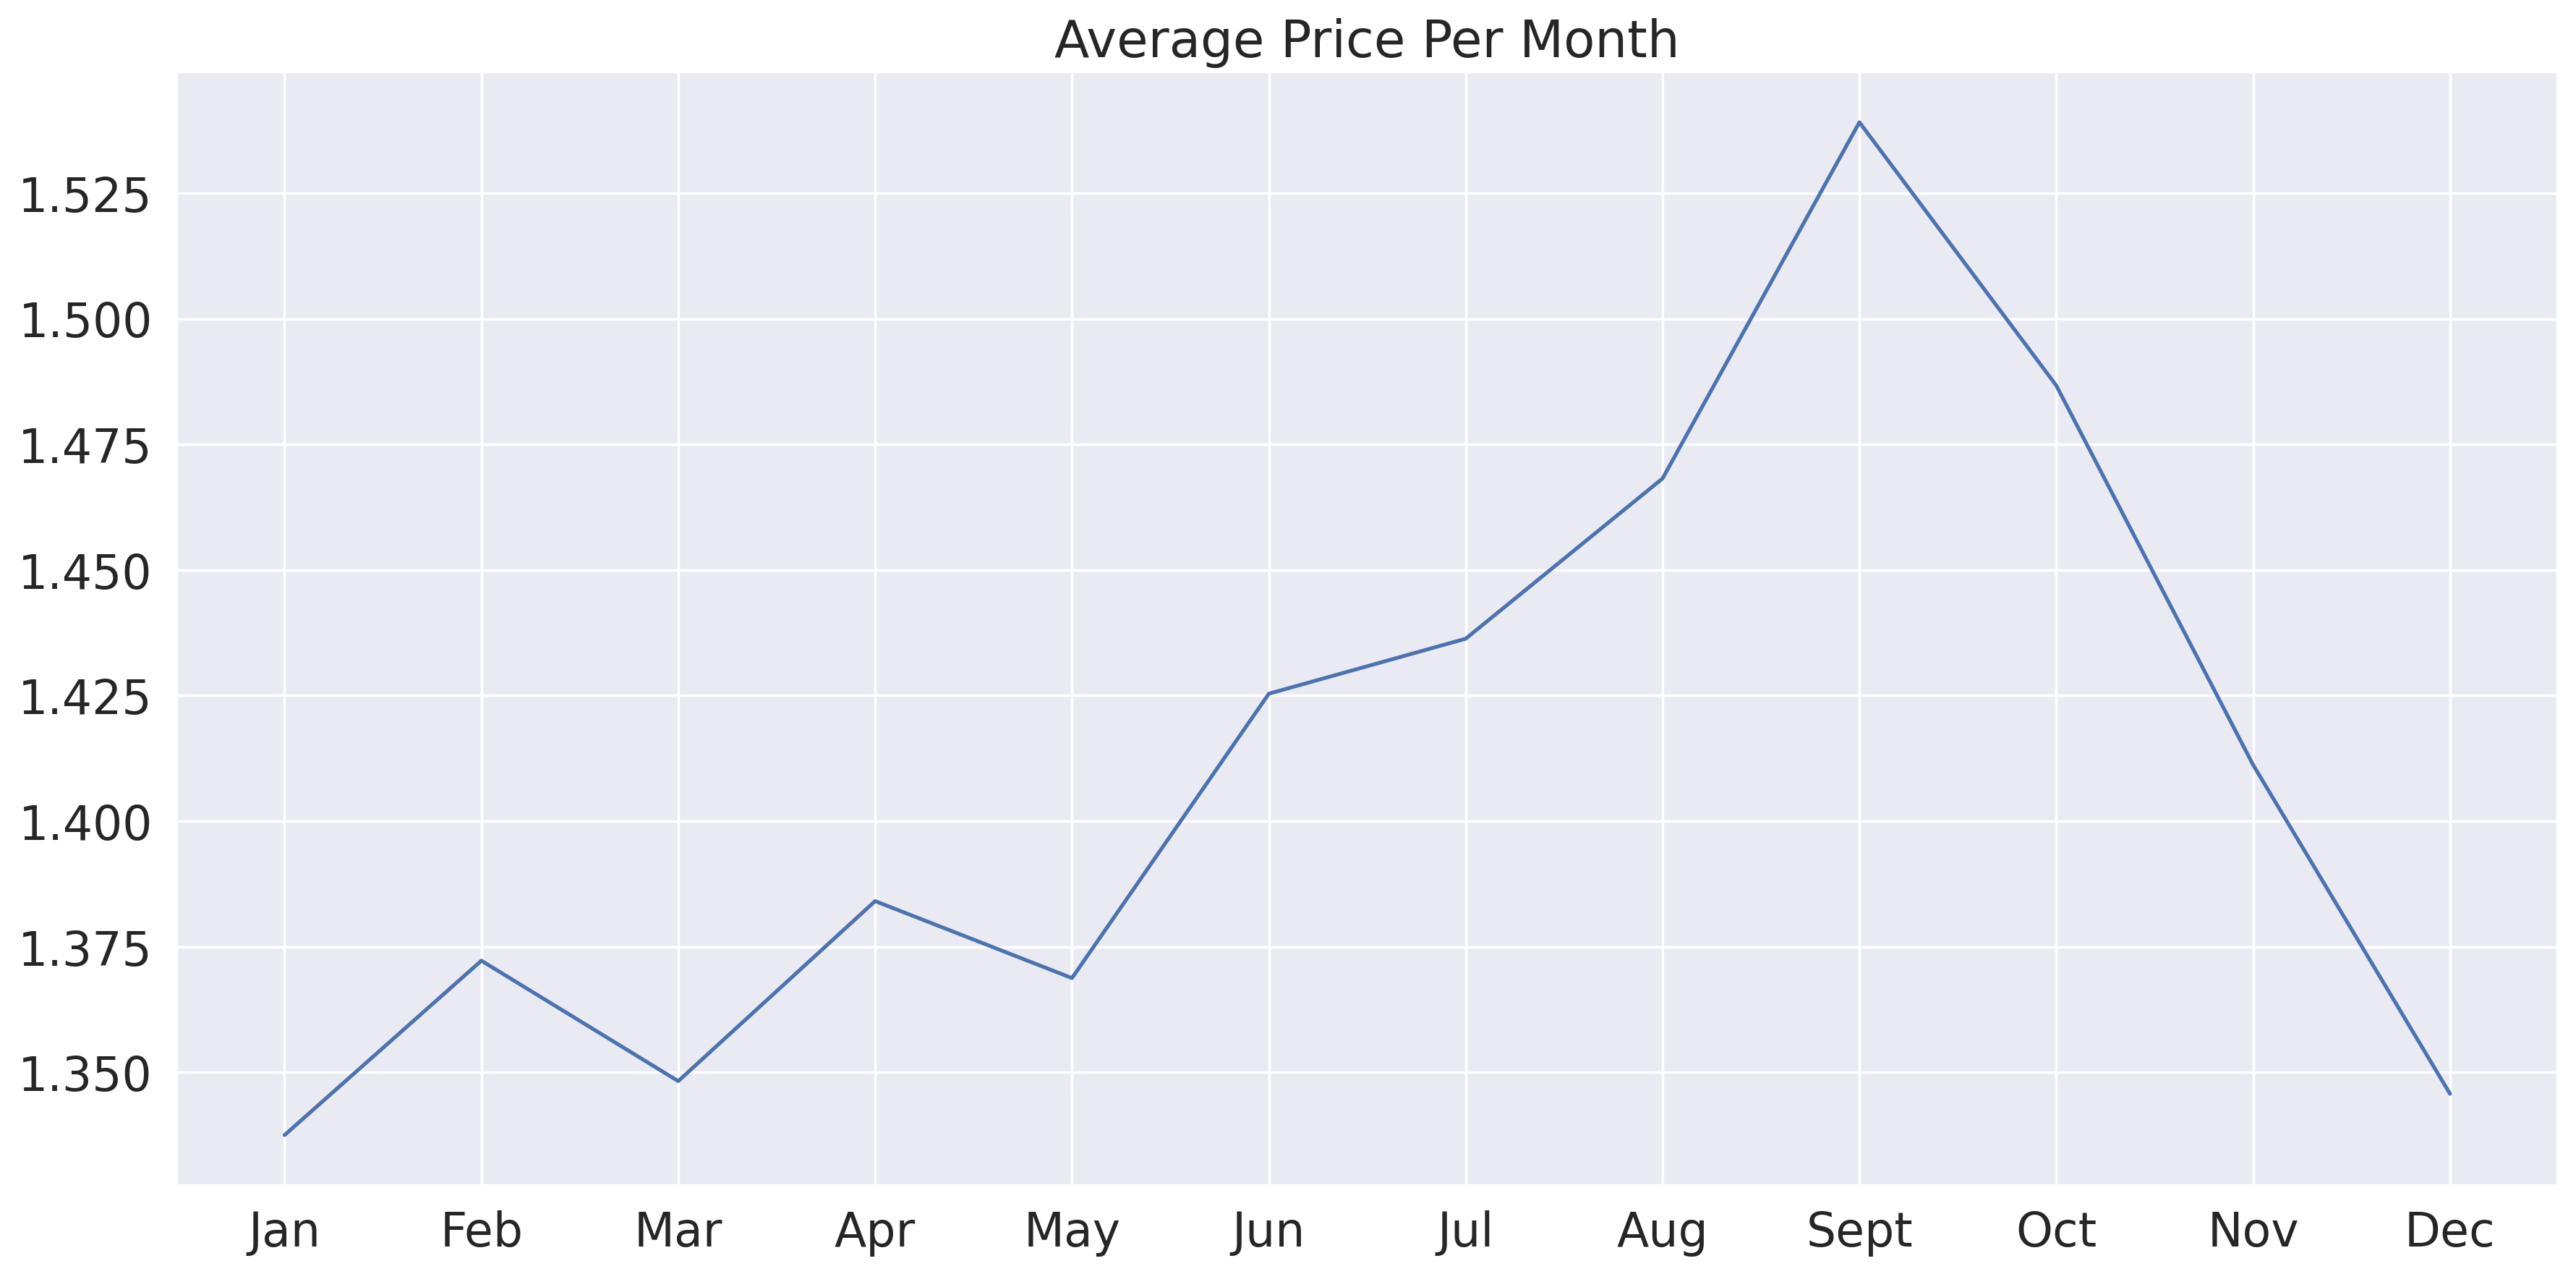

In [ ]:
#Average Price by Month
byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=250)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

From the above graph plotted for average price of avocado per month we can observe that the price rises for a while in February to March then it falls in April and then the month of May witnesses a rise in the average price. This rise reaches its zenith in the month of October and henceforth it starts to fall.

Text(0.5, 1.0, 'Average Price Per Day')

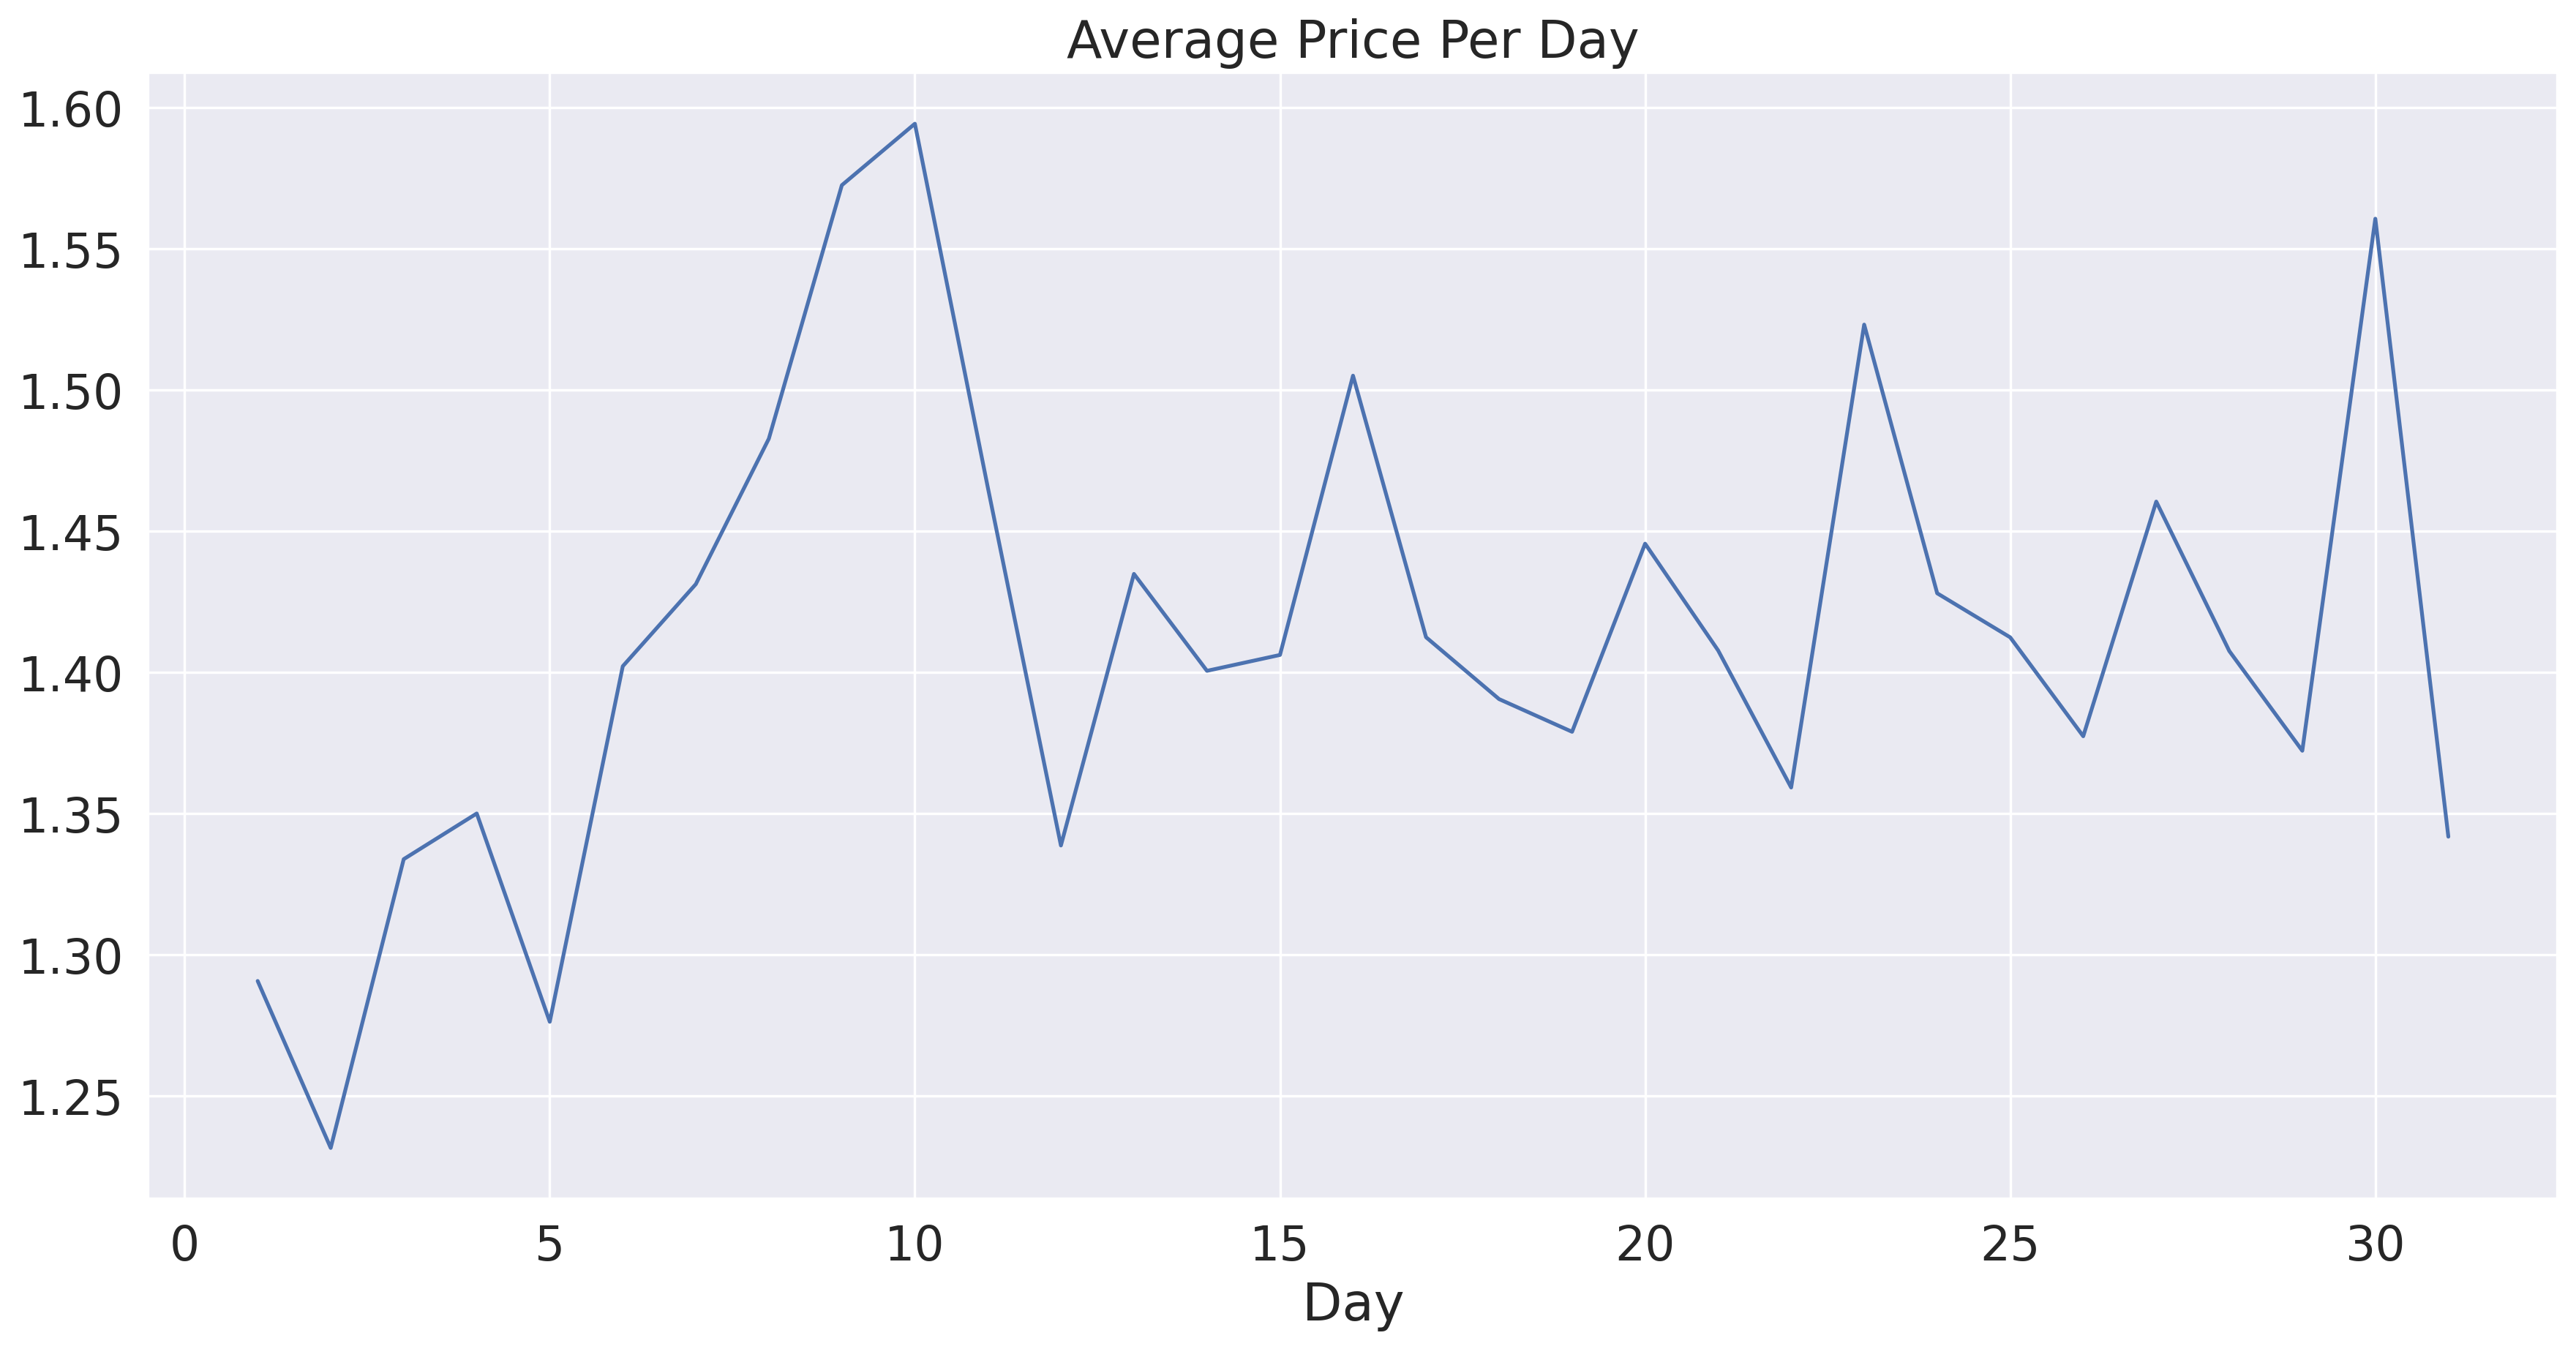

In [ ]:
#Average Price Per Day
byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=250)
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

The above graph for average price per day implies that the price fluctuates in a similar manner at a regular interval.

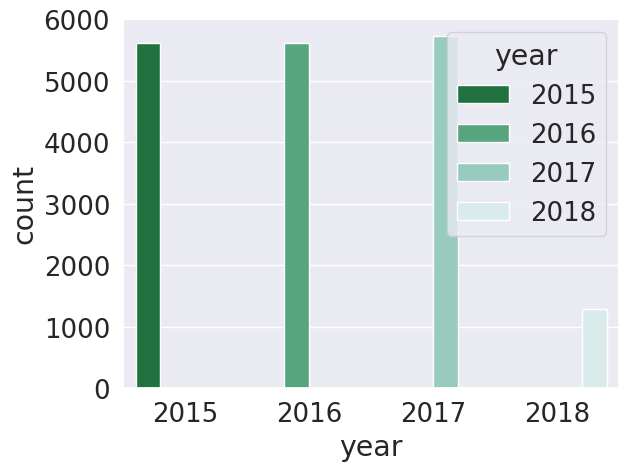

In [ ]:
fig, ax = figsize=(20,10)
sns.countplot(data=df, x='year', hue='year', palette='BuGn_r')
plt.show()

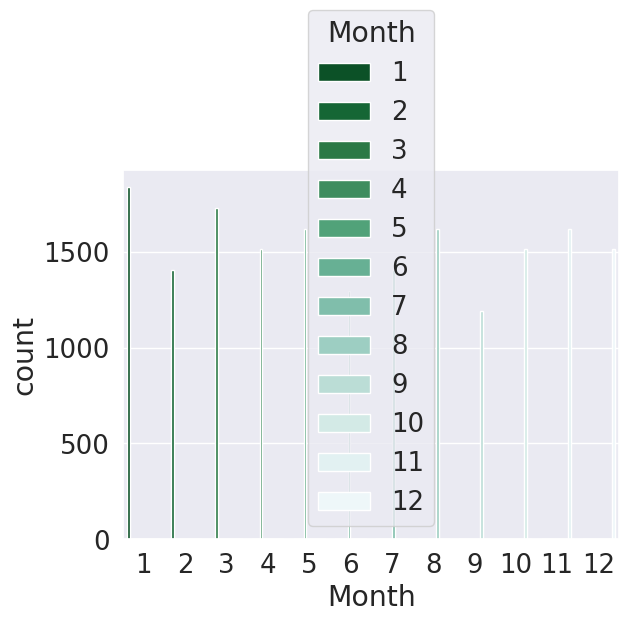

In [ ]:
fig, ax = figsize=(20,10)
sns.countplot(data=df, x='Month', hue='Month', palette='BuGn_r')
plt.show()

Year

*   2015, 2016, and 2017 have almost the same values
*   2018 is the lowest; looks like the avocados should have ended at the begining of 2018


Month

*   Shows a descending pattern; this could be because of the same reason as year:
*   2018 ended at the begging of the year and, therefore, the first months have more entries

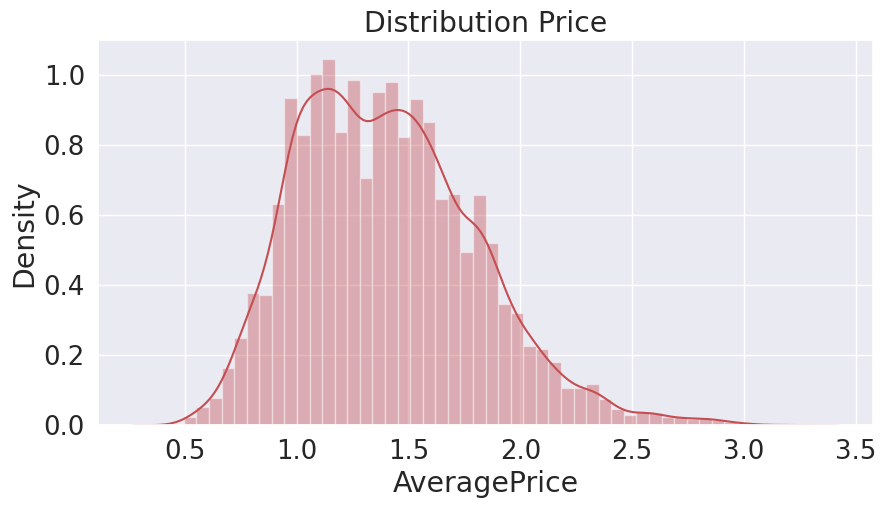

In [ ]:
#The average prices by regions
plt.figure(figsize=(10,5))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

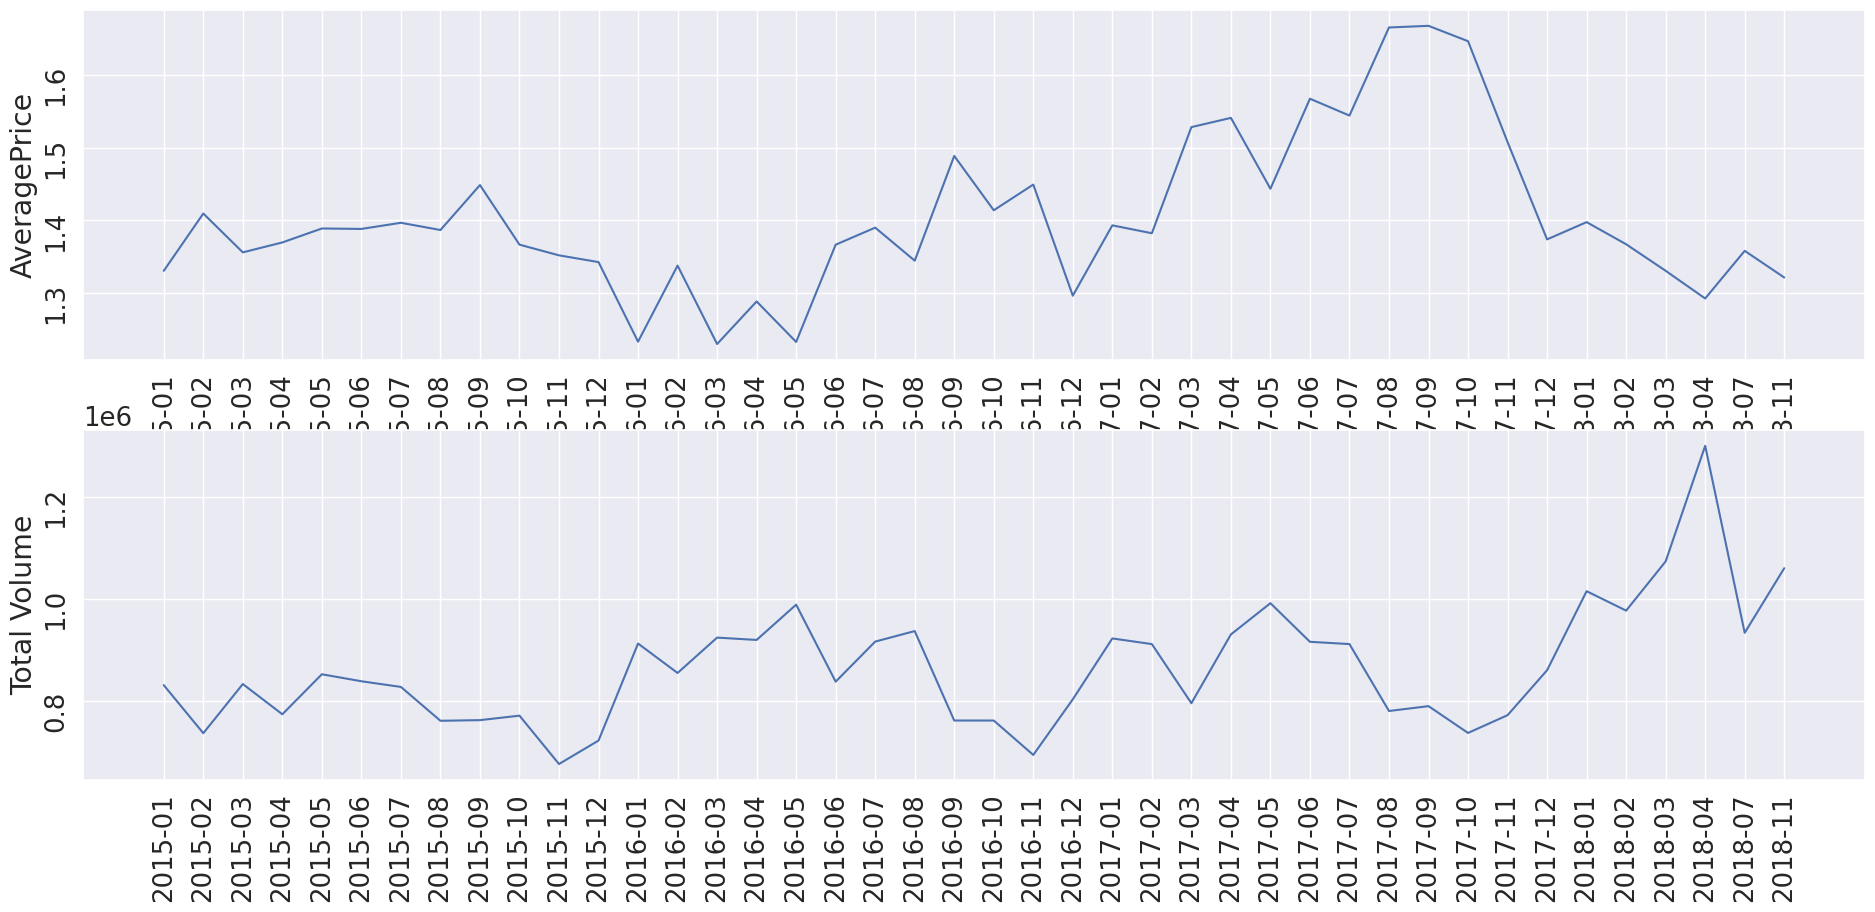

In [ ]:
# Average Price and Average Volume of Avocados

fig, ax = plt.subplots(2, 1, figsize=(23,10))

df['year_month'] =df['Date'].dt.to_period('M')
grouped = df.groupby('year_month')[['AveragePrice', 'Total Volume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')


ax[1].plot(grouped.index.astype(str), grouped['Total Volume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('Total Volume')

plt.show()

•	From the graphic we can tell that the, first of all, average price and total volume move in a different direction

•	Total volume has a spike at the beginning of the year. On the other hand, the average price drops at the beginning of the year

•	These drops and spikes are a sign of seasonality and that could help in forecasting

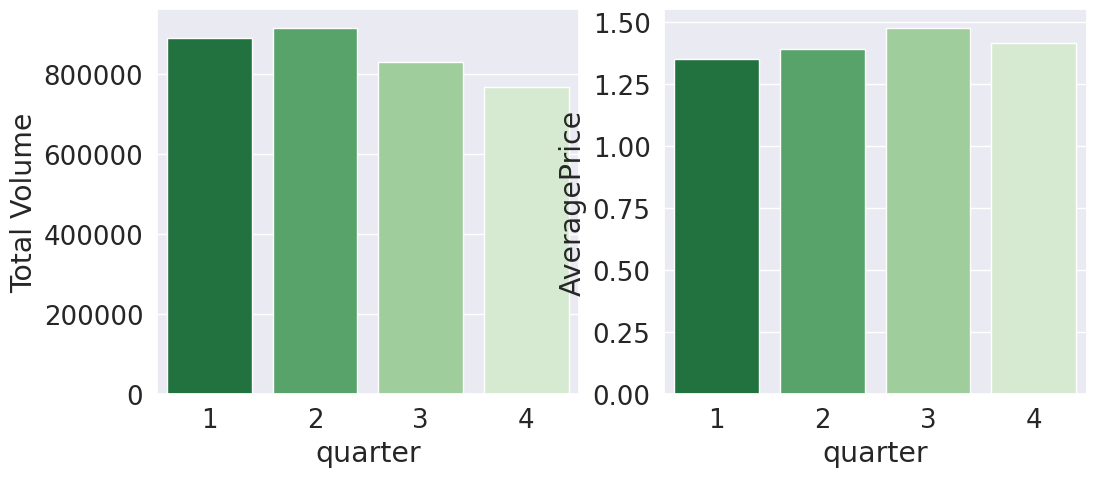

,Total Volume,AveragePrice
quarter,,
1,888725.599698,1.351079
2,915654.034847,1.390554
3,828976.780992,1.477569
4,767612.943230,1.414475


In [ ]:
#Volume/ Average Price quarter anaylsis
fig, ax = plt.subplots(1, 2, figsize=(12,5))

df['quarter'] = df['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=df, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=df, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = df.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

•	So we see that sales are better in the first quarter of the year than in other quarters and prices are the lowest.

•	After the first quarter, sales decrease and prices grow. Given the popularity of avocados, businesses should be considering importing more avocados when they are not produced in the country, a big opportunity for businessmen from both countries.



## Conventional vs Organic Avocados

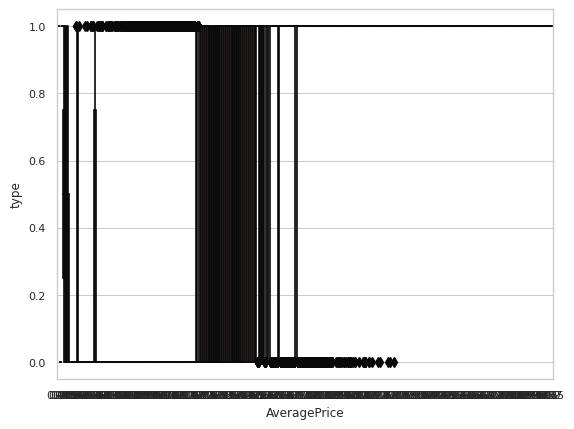

In [ ]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink');

The cost of organic avocados tends to be higher due to the relatively higher expense associated with their cultivation, and the fact that consumers generally value natural products and are willing to pay a premium for them. However, it is plausible that the price of avocados may not be solely determined by their type. Therefore, an investigation into the pricing of avocados from various regions and over multiple years would provide a more comprehensive understanding of the matter. To this end, we shall commence our analysis by examining the pricing trends for organic avocados.

## Region Anaylsis

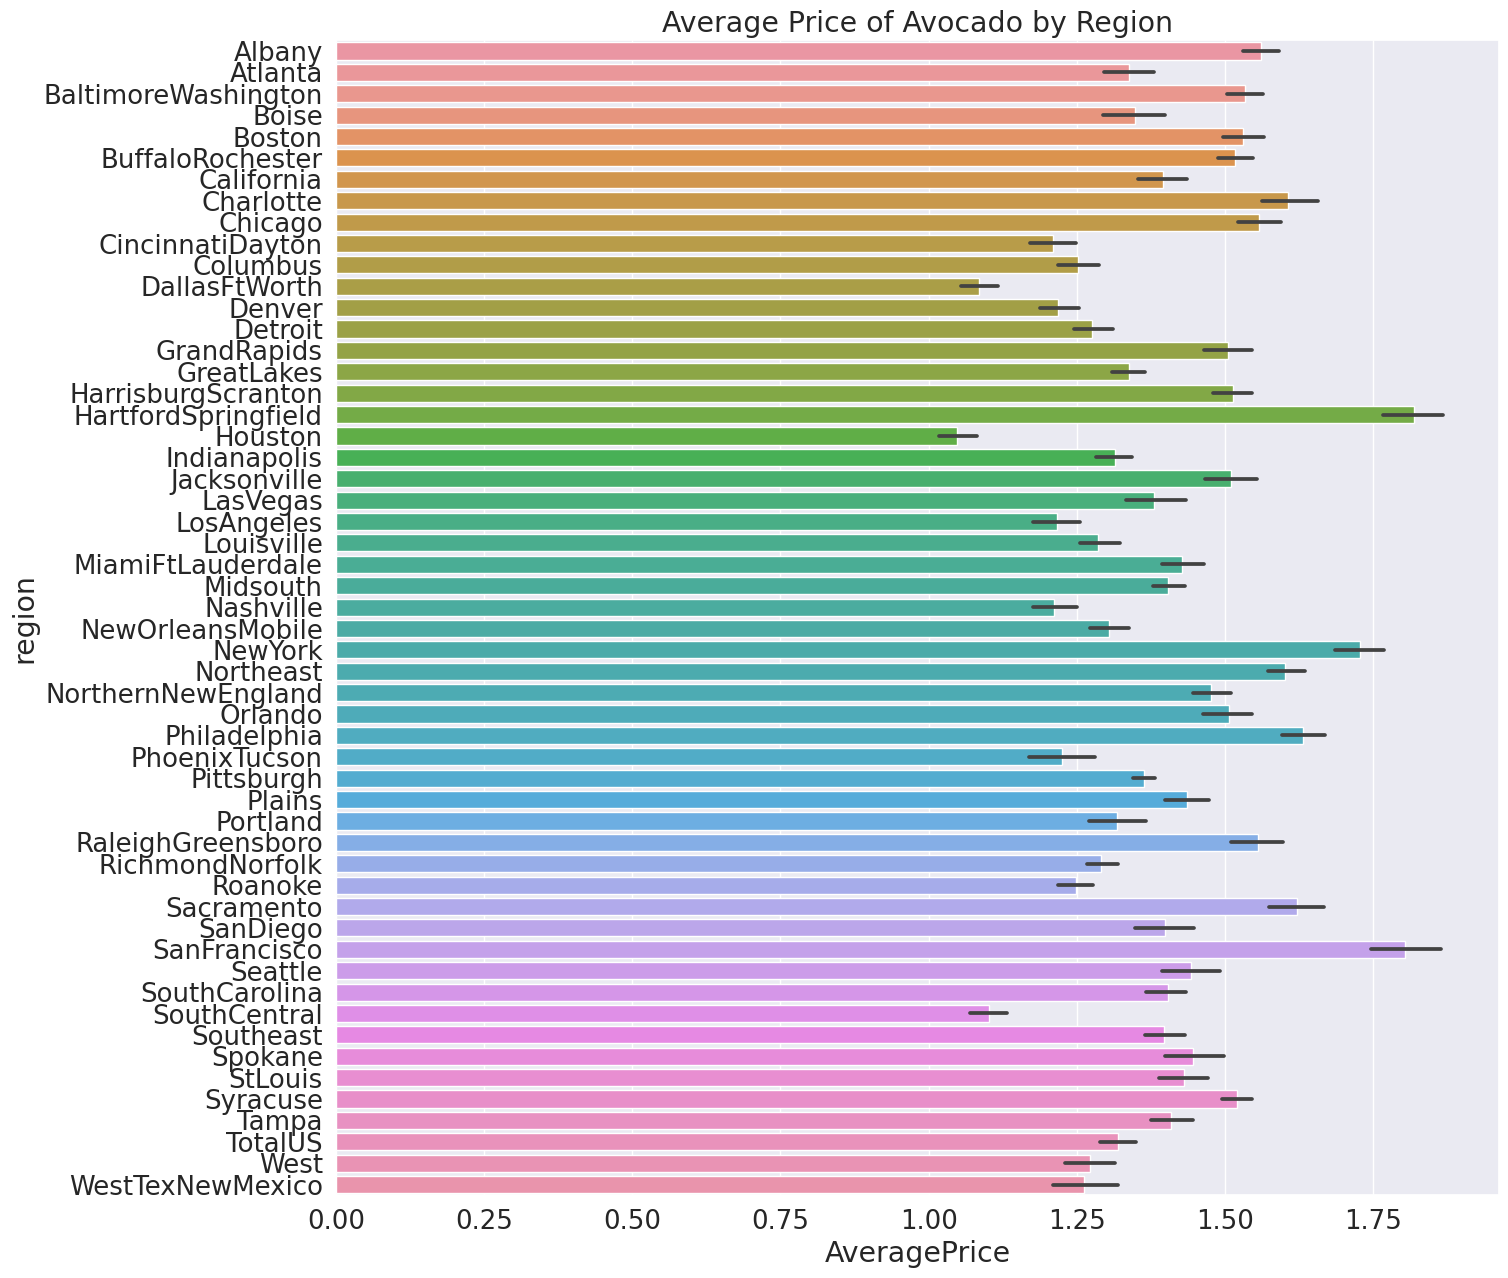

In [ ]:
#Average price by Region
plt.figure(figsize=(15,15))

plt.title("Average Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=df)

plt.show()

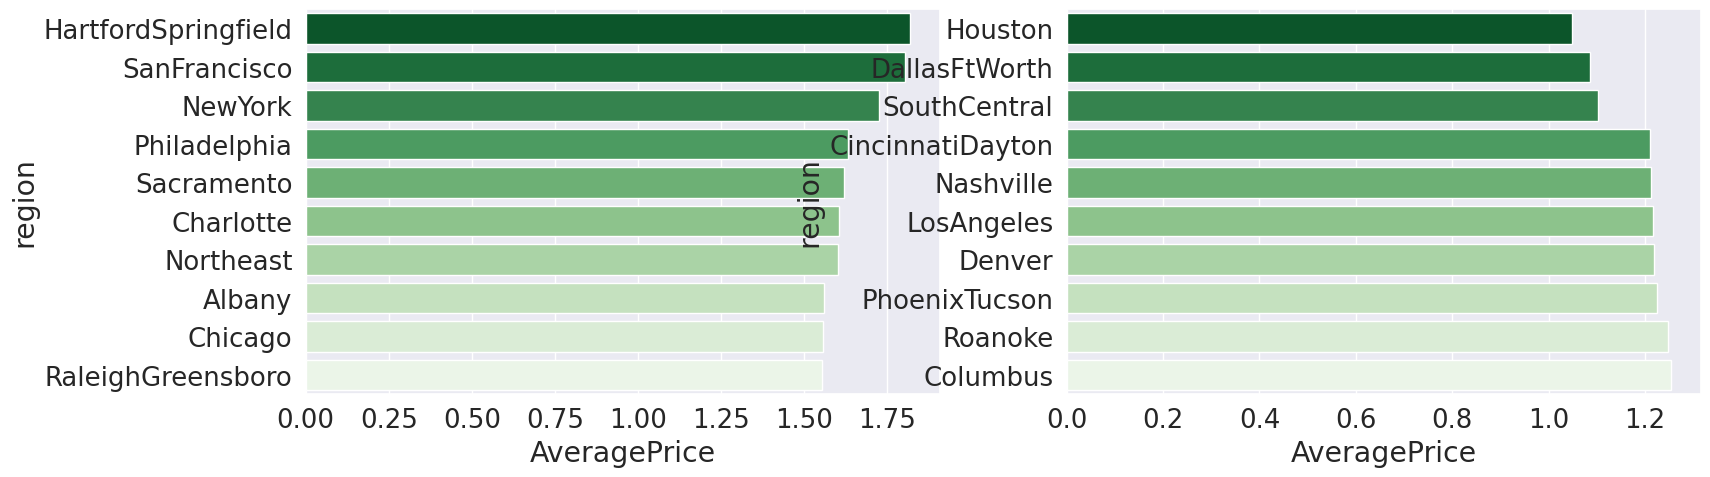

the most expensive datacados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
the cheapest datacados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [ ]:
#The most expensive and cheapest place for Avocados.

fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = df.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data= df,order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = df, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('the most expensive datacados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('the cheapest datacados can be found in {} '.format(list(cheap.iloc[:5,0])))

The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices. While Houston, DallasFtWorth and South Central have the lowest average prices.

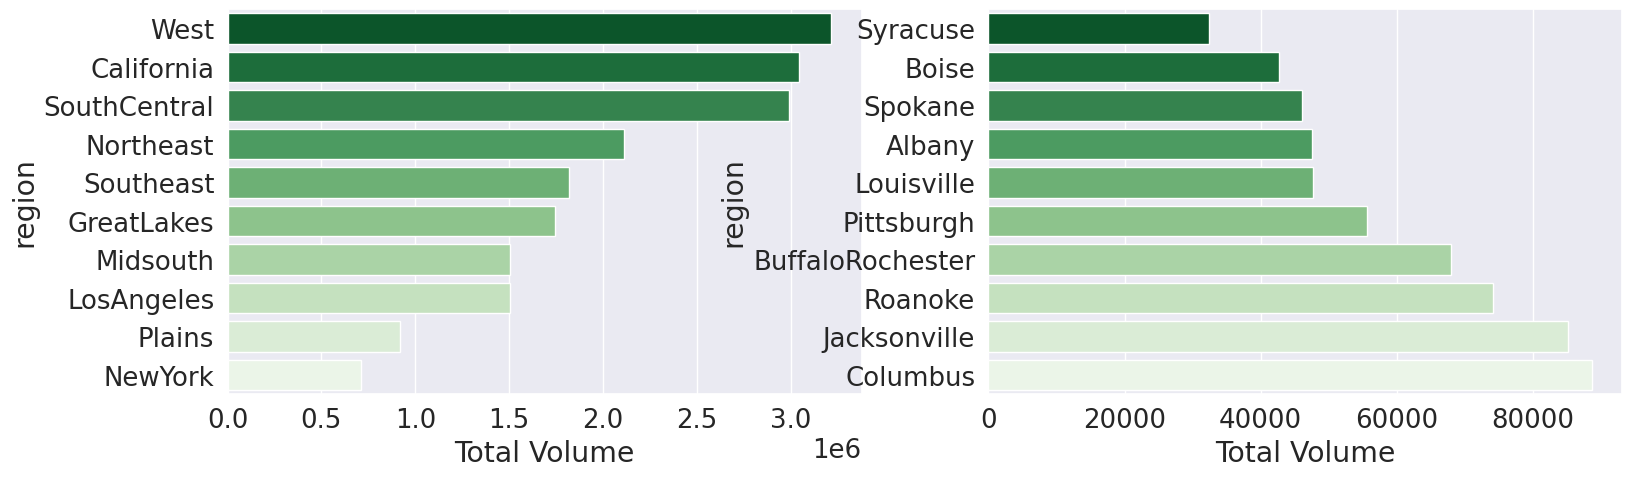

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

dataStates = df[df['region'] !='TotalUS']

regionV = dataStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = dataStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = dataStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

The barplot shows the biggest demand for avocado comes from the West, California and South Central. While the states that saw the least demand was Syracuse, Boise and Spokane.

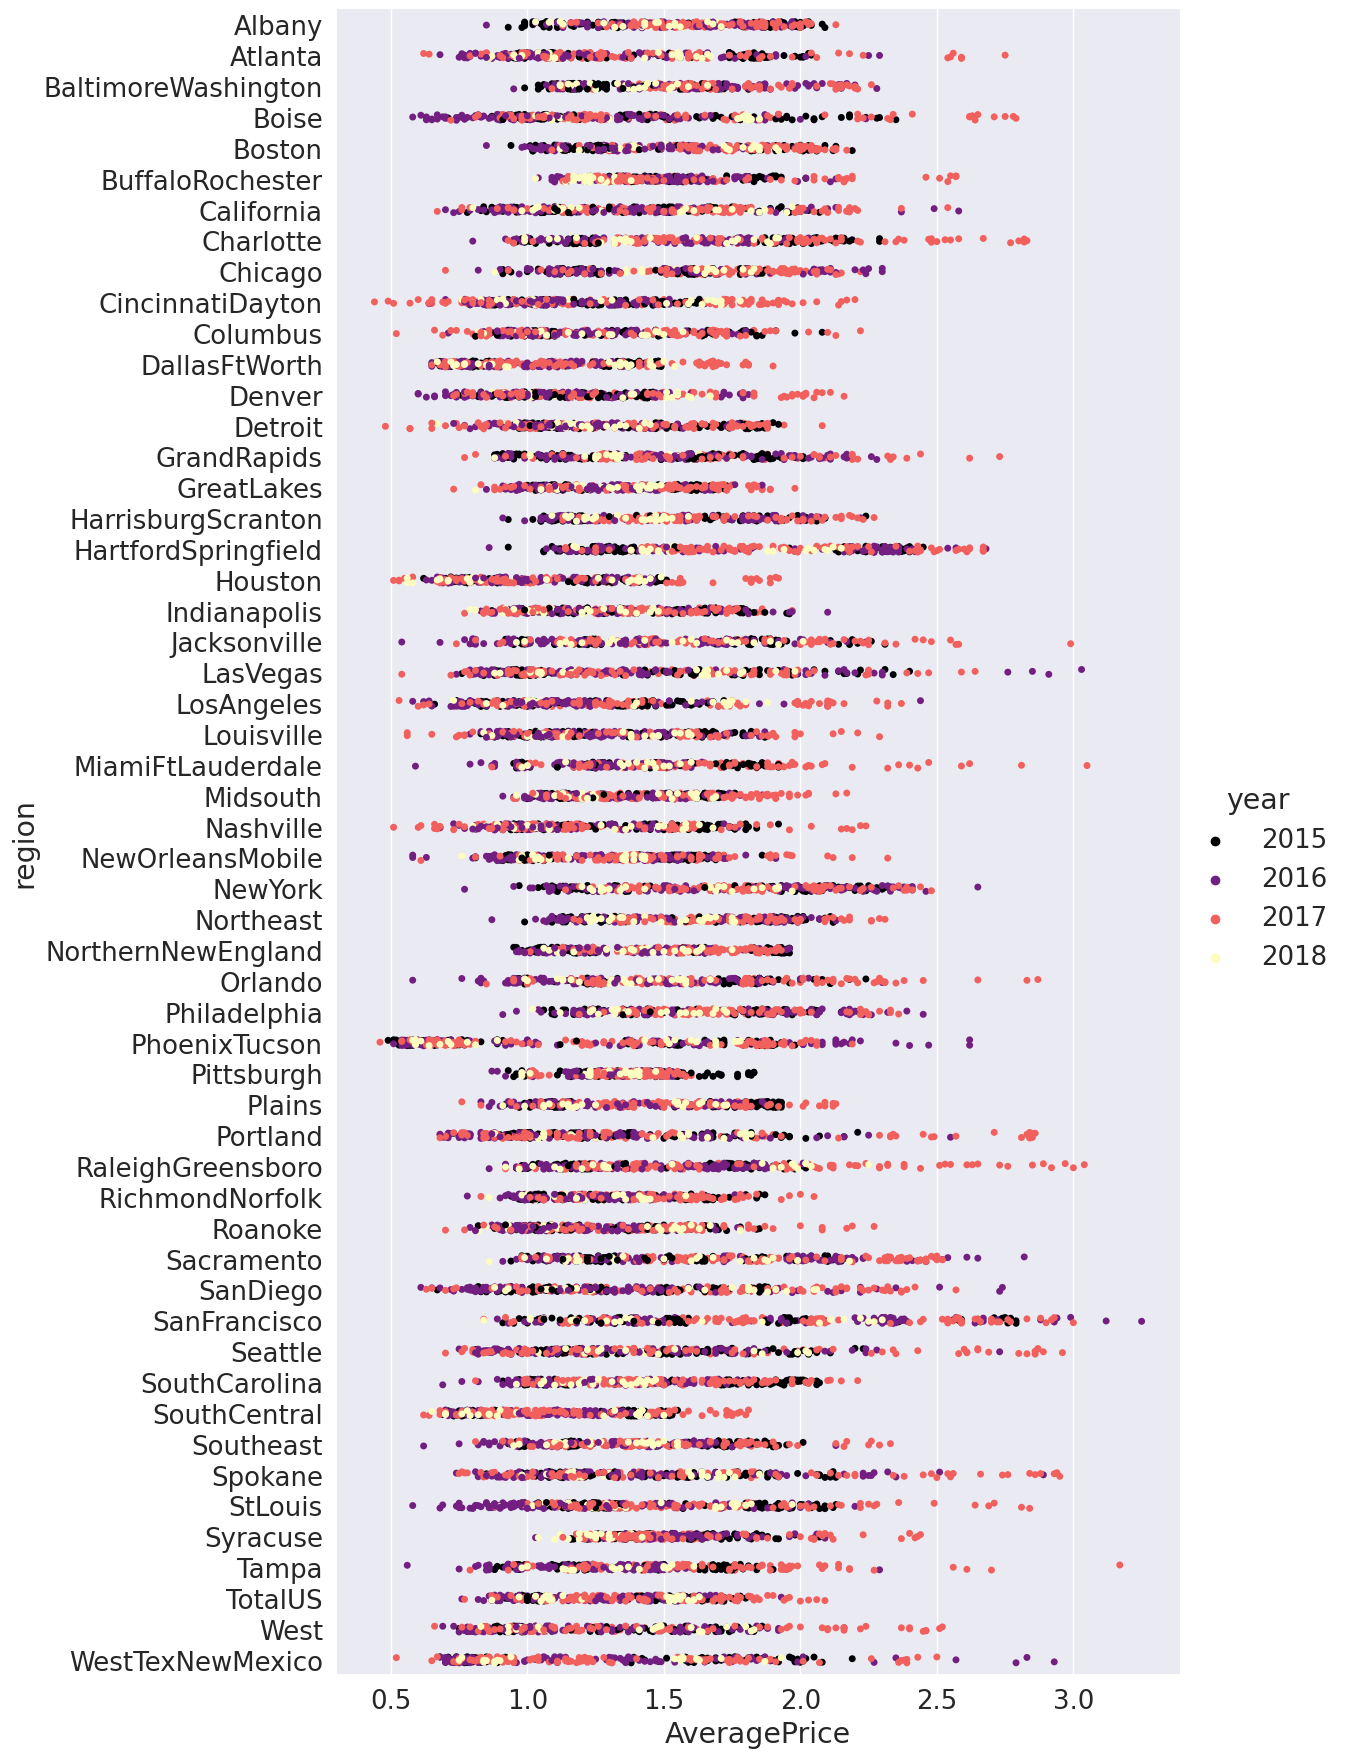

In [ ]:
g = sns.catplot(x='AveragePrice', y='region', data=df, hue='year', height=18, aspect=0.7, palette='magma', kind='strip', dodge=False)

In 2017, organic avocados were very expensive :( Search in Google gave result on this question. In 2017, there was a shortage of avocados. That explains the price increase! For obvious reasons, prices are lower. The situation with price increase in 2017 also affected this type of avocado. Organic avocado type is more expensive. And avocado is generally more expensive with each passing year

##Correlation

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Observation :

There is a high correlation between pairs:

4046 & total volume (0.98) 4225 & total volume (0.97) 4770 & total volume (0.87) total bags & total volume (0.96) small bags & total bags (0.99) etc

4046 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them. Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates())
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type)

In [ ]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

The price of avocado is influenced by the type. Logically. We also see a strong correlation between the features: "Total Bags" and "Total Volume". Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag. It is logical but can create problems if we go to predict the price of avocado.

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(40,15))

data_o = df[df['Total Volume']<50000]

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[0])
ax[0].set_title('With outliers', fontsize=25)

sns.heatmap(data_o.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[1])
ax[1].set_title('Without outliers', fontsize=25)

plt.show()

*   We are going to take the strongest relationship out of the volume variable and the strongest out of a date variable
*   We are going to take the relationships with AveragePrice, out of both heatmaps, since is our target variable for the regression model

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9)
sns.scatterplot(x='Type PLU4046', y='AveragePrice', data=df, hue='type', ax=ax[0,0])
sns.scatterplot(x='Large Bags', y='AveragePrice', data=df, hue='type', ax=ax[0,1])
sns.scatterplot(x='Month', y='AveragePrice', data=df, hue='type', ax=ax[1,0])
sns.scatterplot(x='Month', y='AveragePrice', data=df, hue='type', ax=ax[1,1])
# Labels and clean up on the plot
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('test.pdf', bbox_inches='tight') ;

•	An important insight here is that we can't take the outliers out since all of them correspond to the conventional type, which means that conventional avocados sell way more than organic avocados

•	There doesn't seem to be a relationship between month and AveragePrice. What we can see in this graph is that the average price of conventional avocados is way smaller than the of organic. We are going to take a closer look at this in the further sections

•	There is an expected decreasing trend for both types: the more units sold, the lower the average price is; we will also take a closer look at this later.

•	Perhaps a better way of representing the data is not by taking out the outliers but by normalizing the data; let’s try that now with AveragePrice and 4046


In [ ]:
scaler = Normalizer()
scaler.fit(df[['Type PLU4046', 'AveragePrice']].values)
df['4046_scaled'] = scaler.transform(df[['Type PLU4046', 'AveragePrice']].values)[:,0]
df['AveragePrice_scaled'] = scaler.transform(df[['Type PLU4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=df, color='g')
plt.show()

*   We now know that both the regression and classification is possible since there is a clear tendency

In [ ]:
# Specifying dependent and independent variables

X = df[['Type PLU4046', 'Type PLU4225', 'Type PLU4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]
Y = df['AveragePrice']
y=np.log1p(Y)

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# X_labelled = pd.get_dummies(X[["type","region"]], drop_first = True)
# X_labelled.head()

X = pd.get_dummies(X, prefix=["type","region"], columns=["type","region"], drop_first = True)
X.head()

# 6) Training the Model and Validation

## Split into a Test and Train Set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
df=df.drop(['Date'], axis=1)

In [ ]:
df=df.drop(['year_month'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

##Training the Model

###Multiple Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("R2 of Linear Regresson:", lr.score(X_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

In [ ]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lr.predict(X_test))
plt.title('Distribution of residuals')
plt.show()

In [ ]:
plt.scatter(y_test,lr.predict(X_test));

###Support Vector Regression

In [ ]:
from sklearn.svm import SVR

Parameter Tuning or Hyperparameter

•	Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

•	The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.

•	For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly.

•	A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

•	In other words C behaves as a regularization parameter in the SVM.


In [ ]:
svr = SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))

0.9384089180056469


In [ ]:
from math import sqrt

In [ ]:
# calculate RMSE
error = sqrt(metrics.mean_squared_error(y_test,svr.predict(X_test)))
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.40127249164482043


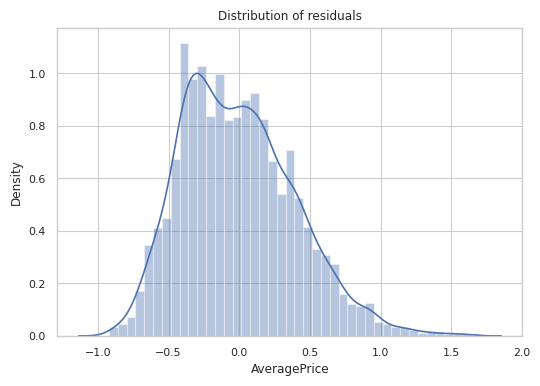

In [ ]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - svr.predict(X_test))
plt.title('Distribution of residuals')
plt.show()

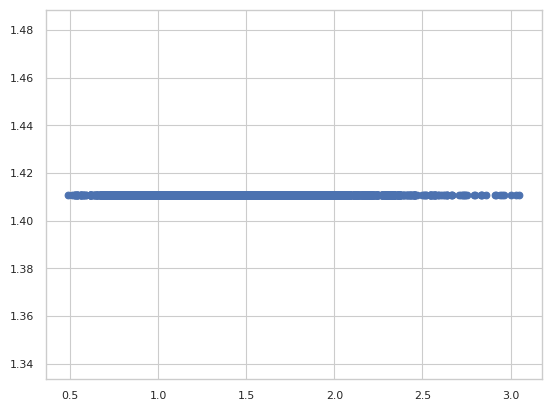

In [ ]:
plt.scatter(y_test,svr.predict(X_test));

In [ ]:
# Linear Regression RMSE :
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))),4))

# SVR RMSE               :
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, svr.predict(X_test))),4))

In [ ]:
data_dt=df # for decision tree alogorithm

In [ ]:
df=df.drop(['Day'], axis=1)

##Train and Validation

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

In [ ]:
X=df.drop('AveragePrice',1)
y=df['AveragePrice']

In [ ]:
print('shape of X and y respectively :',X.shape,y.shape)

In [ ]:
X.head()

,Total Volume,Type PLU4046,Type PLU4225,Type PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,quarter,4046_scaled,AveragePrice_scaled
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,4,0.999999,0.001283
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,4,0.999998,0.002002
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,4,0.999999,0.001170
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,6,2,1.000000,0.000954
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,4,0.999999,0.001360


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (14599, 15) (14599,)
shape of X and y respectively(test) : (3650, 15) (3650,)


In [ ]:
cols=X_train.columns

##Preprocessing- Encoding

In [ ]:
scaler=LabelEncoder()

In [ ]:
for col in X_train.columns:
    if df[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

In [ ]:
X_train.head()

,Total Volume,Type PLU4046,Type PLU4225,Type PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,quarter,4046_scaled,AveragePrice_scaled
14902,1797.04,28.34,552.03,0.00,1216.67,264.39,952.28,0.00,1,2017,3,12,4,0.998011,0.063036
7537,362296.15,97772.92,104336.09,14152.16,146034.98,92339.30,52994.80,700.88,0,2017,36,1,1,1.000000,0.000019
9720,12801.03,11536.00,337.16,0.00,927.87,927.87,0.00,0.00,1,2015,11,7,3,1.000000,0.000099
2105,550810.62,161220.26,305122.62,17131.92,67335.82,67335.82,0.00,0.00,0,2015,40,5,2,1.000000,0.000008
18083,8634.75,2317.50,3561.20,0.00,2756.05,2752.63,3.42,0.00,1,2018,40,11,4,1.000000,0.000820


In [ ]:
X_train.shape

(14599, 15)

In [ ]:
X_test.shape

(3650, 15)

##Pipeline

As this is a regression problem we are going to use famous regression models -

Polynomial Regression

RandomForest Regression

Bayesian Ridge Regression

In [ ]:
actr=[]
acts=[]
lstr=[]
lsts=[]

###Polynomial Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(2,5):
  clf=make_pipeline(PolynomialFeatures(i),LinearRegression())
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

In [ ]:
plt.title('Model Loss')
plt.xlabel('degree')
plt.ylabel('MSE loss')
plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

We can say that degree =3 is appropriate for the model as the validation has too little loss and after that it reaches to a very high peak. That means after degree>3 ,the model is overfitting.

In [ ]:
print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

Train loss and validation loss of the polynomial function model : 14.3894688912202 and 298.958583699404


In [ ]:
clf=make_pipeline(PolynomialFeatures(3),LinearRegression())
clf.fit(X_train,y_train)
print('train accuracy :',clf.score(X_train,y_train))
print('test accuracy :',clf.score(X_test,y_test))

train accuracy : -87.86713279615958
test accuracy : -1834.3790370287645


###Random Forest Regression

In [ ]:
clf=RandomForestRegressor(random_state=0)

In [ ]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

In [ ]:
print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9835112905404627
test data accuracy : 0.8782431669223916
loss of train data : 0.002669870900061649
loss of test data : 0.01983255209863013


So we can see the RFR really predicts the model very well and gives a quite accurate prediction

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))